In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import seaborn as sns
df=pd.read_csv("C:\\Users\\admin\\Downloads\\50_Startups.csv")


In [2]:
df =df.rename(columns={"R&D Spend":"RnD","Marketing Spend": "Marketing_Spend"})
df

,RnD,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
df1=df.drop(["State"],axis=1)
df1

,RnD,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RnD              50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
df1.describe()

,RnD,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df1.isna().sum()

RnD                0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

In [7]:
df1.corr()

,RnD,Administration,Marketing_Spend,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


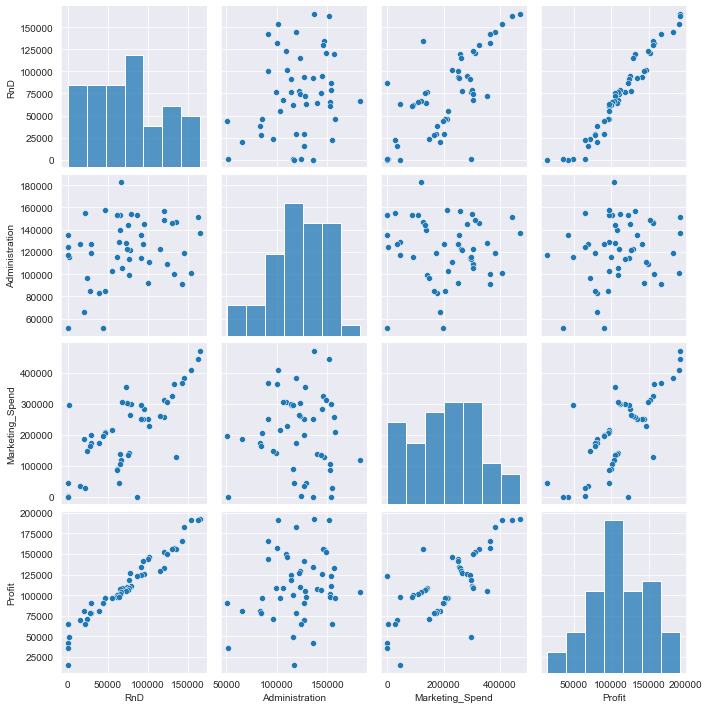

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Preparing a model

In [9]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RnD+Administration+Marketing_Spend',data=df1).fit()

In [10]:
model.params

Intercept          50122.192990
RnD                    0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [11]:
print(model.tvalues, '\n',model.pvalues)

Intercept           7.626218
RnD                17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RnD                2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Calculating VIF

In [13]:
RnD=smf.ols('RnD~Administration+Marketing_Spend',data=df1).fit().rsquared
RnD=1/(1-RnD)

Administration=smf.ols('Administration~RnD+Marketing_Spend',data=df1).fit().rsquared
Administration=1/(1-Administration)

Marketing_Spend=smf.ols('Marketing_Spend~RnD+Administration',data=df1).fit().rsquared
Marketing_Spend=1/(1-Marketing_Spend)

df1={'Variables':['RnD','Administration','Marketing_Spend'],
    'VIF':[RnD,Administration,Marketing_Spend]}

df2=pd.DataFrame(df1)
df2


,Variables,VIF
0,RnD,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [14]:
# Residual Analysis

In [15]:
np.random.normal()

-0.7046526736388551

# Test for Normality of Residuals (Q-Q Plot)

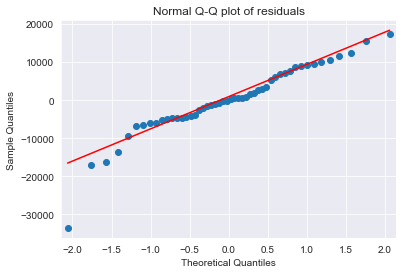

In [16]:
import statsmodels.api as sm
QQplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [17]:
residuals = model.resid
residuals

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

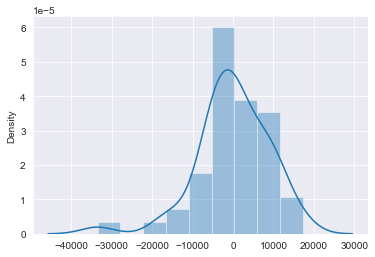

In [18]:
sns.distplot(residuals)

In [19]:
residuals.mean()

7.625203579664231e-11

In [20]:
predictions = model.fittedvalues;
predictions

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [36]:
df1.head(4)

,RnD,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99


In [39]:
pd.DataFrame({'Actual':df1.Profit,
             'Predicted':predictions,
             'Error':residuals})

,Actual,Predicted,Error
0,192261.83,192521.252890,-259.422890
1,191792.06,189156.768232,2635.291768
2,191050.39,182147.279096,8903.110904
3,182901.99,173696.700026,9205.289974
4,166187.94,172139.514183,-5951.574183
5,156991.12,163580.780571,-6589.660571
6,156122.51,158114.096669,-1991.586669
7,155752.60,160021.363048,-4268.763048
8,152211.77,151741.699699,470.070301
9,149759.96,154884.684110,-5124.724110


In [40]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

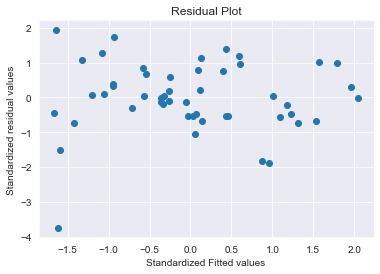

In [41]:
plt.scatter(get_standardized_values(predictions),
            get_standardized_values(residuals))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


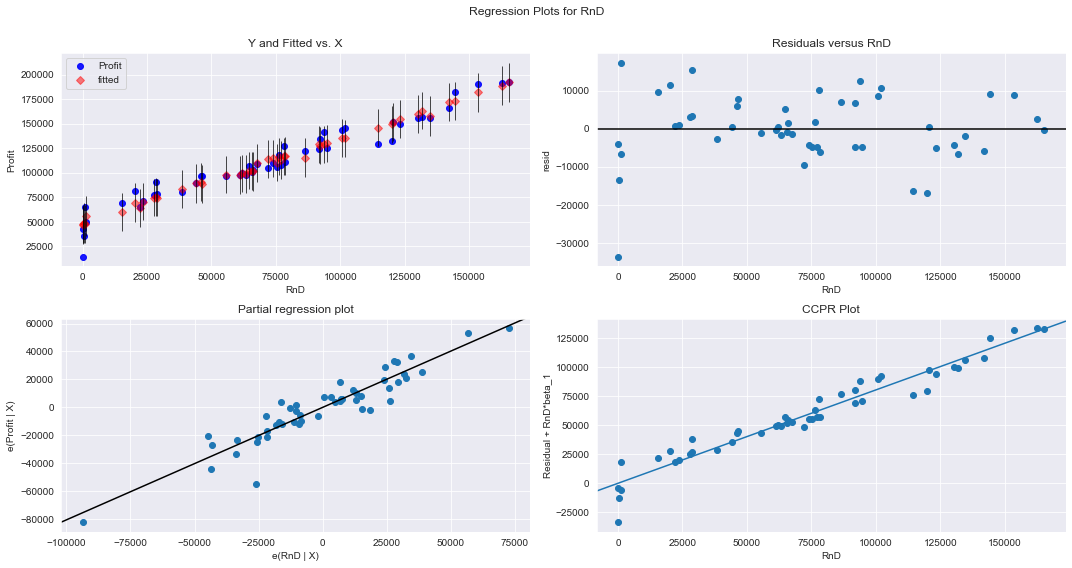

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig=fig)
plt.show()

eval_env: 1


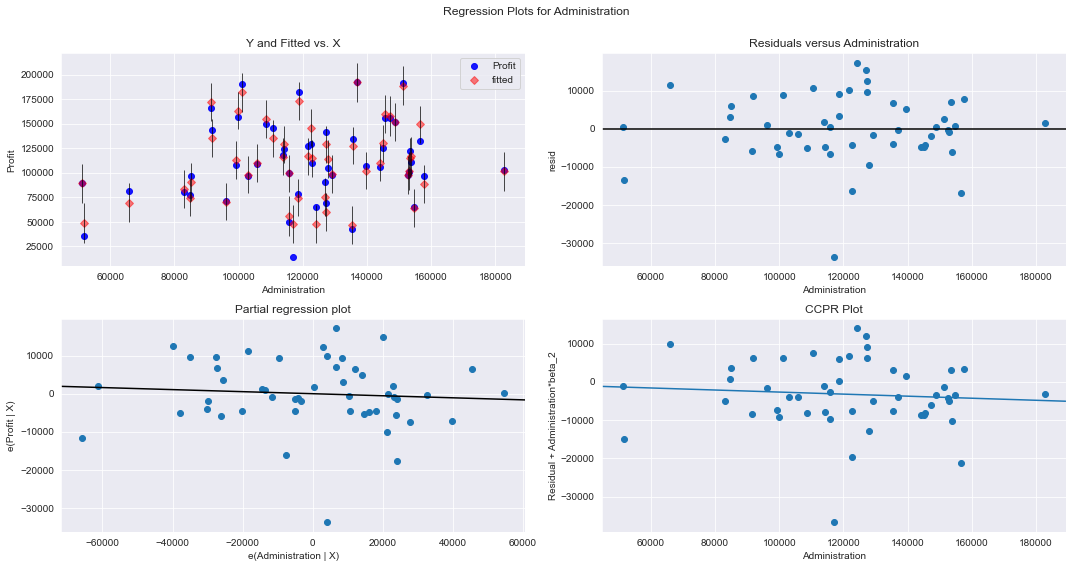

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


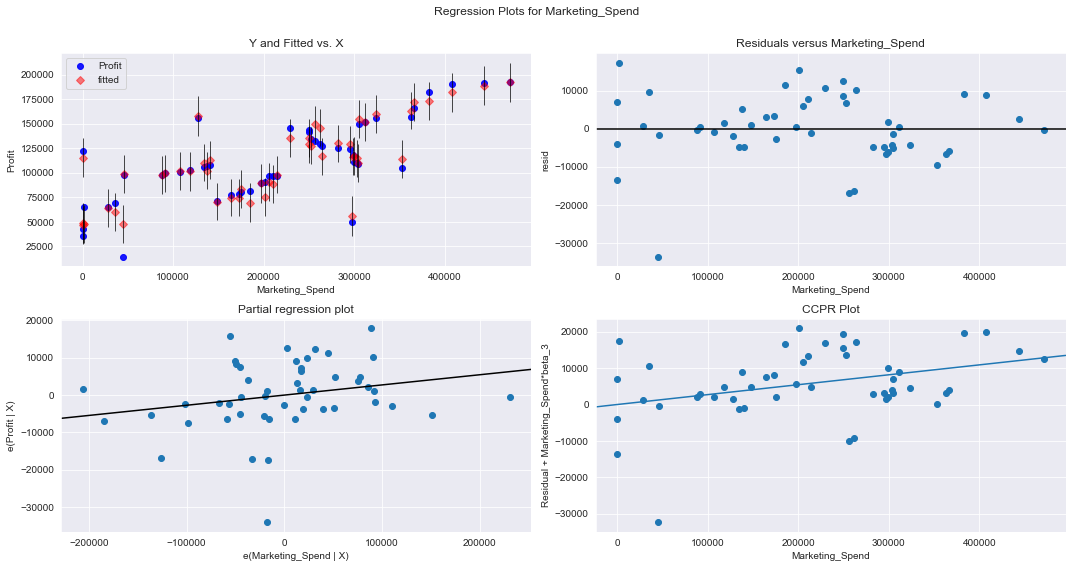

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook's Distance

In [45]:
model_influence =model.get_influence()
(c, _)=model_influence.cooks_distance

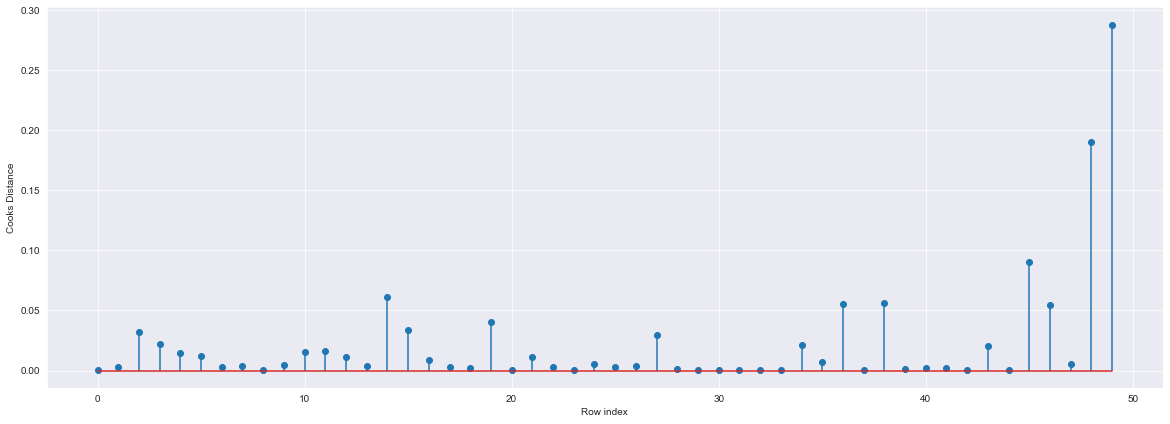

In [46]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence points

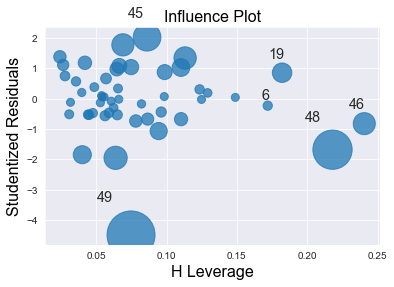

In [48]:
from statsmodels.graphics.regressionplots import influence_plot 
influence_plot(model)
plt.show()

In [49]:
k = df1.shape[1] 
n = df1.shape[0] 

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [50]:
df1[df1.index.isin([49])]

,RnD,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [51]:
df1.iloc[[49],:]

,RnD,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [52]:
df1.head()

,RnD,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Improving the model

In [53]:
df3=df1.drop(df1.index[[49]],axis=0).reset_index()
df3=df3.drop(['index'],axis=1)
df3

,RnD,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [54]:
model1=smf.ols('Profit~RnD+Administration+Marketing_Spend',data=df3).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           8.85e-32
Time:                        20:30:35   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD                 0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
model1_influence = model1.get_influence()
(c1, _) = model1_influence.cooks_distance

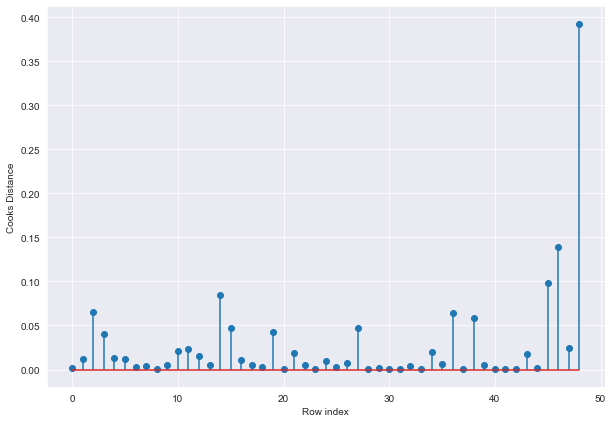

In [56]:
fig = plt.subplots(figsize=(10, 7))
plt.stem(np.arange(len(df3)), np.round(c1, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [57]:
(np.argmax(c1),np.max(c1))

(48, 0.39274420556321554)

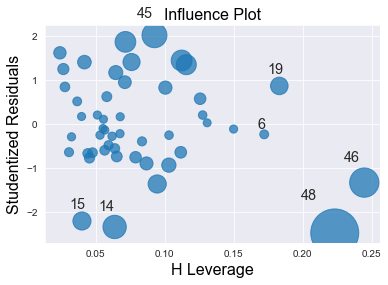

In [58]:
influence_plot(model1)
plt.show()

In [59]:
df4=df3.drop(df1.index[[46,48]],axis=0).reset_index()
df4=df4.drop(['index'],axis=1)
df4

,RnD,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [60]:
model2=smf.ols('Profit~RnD+Administration+Marketing_Spend',data=df3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           8.85e-32
Time:                        20:30:39   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD                 0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
model2_influence = model2.get_influence()
(c2, _) = model2_influence.cooks_distance

In [62]:
(np.argmax(c2),np.max(c2))

(48, 0.39274420556321554)

# Prediction for new data 

In [63]:
 new_data=pd.DataFrame({'RnD':14500,'Administration':11500,'Marketing_Spend':36000},index=[1])
model2.predict(new_data)

1    64389.061162
dtype: float64

In [65]:
model2.predict()

array([190716.67699881, 187537.12222744, 180575.52639649, 172461.14464179,
       170863.48672087, 162582.58317676, 157741.3386332 , 159347.73531837,
       151328.82694147, 154236.84677775, 135507.7926824 , 135472.85562054,
       129355.59944933, 127780.12913907, 149295.40479556, 145937.94197463,
       117437.62792078, 130408.62629498, 129129.23445693, 116641.00312136,
       117097.73186633, 117911.0190379 , 115248.21779618, 110603.13904455,
       114051.07387695, 103398.05438476, 111547.63893525, 114916.16502611,
       103027.22943393, 103057.62176061, 100656.41022682,  99088.21369335,
       100325.74133468,  98962.30313636,  90552.30780938,  91709.28867233,
        77080.55425533,  90722.50324366,  71433.02195555,  85147.37564578,
        76625.51030344,  76492.14517491,  72492.3949737 ,  62592.04971805,
        67025.73110714,  50457.29720619,  58338.44362472,  49375.77665539,
        51658.09681209])